# Funnel Decomposition Analysis - Demo

This notebook demonstrates the funnel decomposition analysis workflow, showing how to:
1. Load booking funnel data
2. Calculate hierarchical decomposition effects
3. Visualize results with waterfall charts
4. View detailed breakdowns by dimension

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Import from src package
from src import hier_decomposition_calculator
from src import visualization_engine

# Configure matplotlib for inline display
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 12)
plt.rcParams['figure.dpi'] = 100

## 1. Load Mock Data

The dataset contains 24 months of booking funnel data with:
- **Dimensions**: FICO bands (High/Med/Low/Null), offer competition tier, product line
- **Funnel metrics**: Applications, approval rates, booking rates
- **Segments**: 24 segments per month (4 FICO bands × 3 offer tiers × 2 product lines)

In [2]:
# Load data
# Update this path to point to your data file
data_path = 'funnel_data_mock_v2.csv'
df = pd.read_csv(data_path)
df['month_begin_date'] = pd.to_datetime(df['month_begin_date'])

print(f"Loaded {len(df)} rows of data")
print(f"\nDate range: {df['month_begin_date'].min().date()} to {df['month_begin_date'].max().date()}")
print(f"Unique months: {df['month_begin_date'].nunique()}")
print(f"Segments per month: {len(df) // df['month_begin_date'].nunique()}")

# Show sample data
print("\nSample data:")
df.head(10)

Loaded 1728 rows of data

Date range: 2023-01-01 to 2024-12-01
Unique months: 24
Segments per month: 72

Sample data:


,lender,month_begin_date,fico_bands,offer_comp_tier,prod_line,num_tot_bks,num_tot_apps,pct_of_total_apps,str_apprv_rate,str_bk_rate,cond_apprv_rate,cond_bk_rate
0,ACA,2023-01-01,High_FICO,multi_best,Used,4480,15457,0.119658,0.511434,0.543518,0.274141,0.293948
1,ACA,2023-01-01,High_FICO,multi_best,VMax,4480,15457,0.076923,0.519058,0.562400,0.218179,0.238149
2,ACA,2023-01-01,High_FICO,multi_other,Used,4480,15457,0.064103,0.506125,0.553622,0.250533,0.252526
3,ACA,2023-01-01,High_FICO,multi_other,VMax,4480,15457,0.038462,0.519716,0.583189,0.271450,0.250301
4,ACA,2023-01-01,High_FICO,solo_offer,Used,4480,15457,0.145299,0.535860,0.494889,0.255789,0.307471
5,ACA,2023-01-01,High_FICO,solo_offer,VMax,4480,15457,0.094017,0.526114,0.522786,0.262885,0.274057
6,ACA,2023-01-01,Low_FICO,multi_best,Used,4480,15457,0.031624,0.293352,0.368758,0.406648,0.174373
7,ACA,2023-01-01,Low_FICO,multi_best,VMax,4480,15457,0.015385,0.291933,0.384067,0.408067,0.190754
8,ACA,2023-01-01,Low_FICO,multi_other,Used,4480,15457,0.015385,0.296742,0.312354,0.403258,0.171332
9,ACA,2023-01-01,Low_FICO,multi_other,VMax,4480,15457,0.007692,0.267162,0.404380,0.432838,0.161063


## 2. Calculate Decomposition

We'll decompose the booking change from **June 2023 → June 2024** (Year-over-Year) into 6 effects:
1. **Volume Effect**: Change due to total application volume
2. **Mix Effect**: Change due to segment mix (dimension distribution)
3. **Straight Approval Effect**: Change in straight approval rates
4. **Conditional Approval Effect**: Change in conditional approval rates
5. **Straight Booking Effect**: Change in straight booking rates
6. **Conditional Booking Effect**: Change in conditional booking rates

In [3]:
# Calculate decomposition for June 2023 → June 2024 (Year-over-Year)
results = hier_decomposition_calculator.calculate_decomposition(
    df=df,
    date_a='2023-06-01',
    date_b='2024-06-01',
    lender='ACA'
)

print("Decomposition Results:")
print(f"  Period 1: {results.metadata['date_a']}")
print(f"  Period 2: {results.metadata['date_b']}")
print(f"  Period 1 bookings: {results.metadata['period_1_total_bookings']:,.0f}")
print(f"  Period 2 bookings: {results.metadata['period_2_total_bookings']:,.0f}")
print(f"  Delta bookings: {results.metadata['delta_total_bookings']:+,.0f}")
print(f"\n  Number of segments: {results.metadata['num_segments']}")

Decomposition Results:
  Period 1: 2023-06-01
  Period 2: 2024-06-01
  Period 1 bookings: 5,092
  Period 2 bookings: 5,187
  Delta bookings: +95

  Number of segments: 24


## 3. View Summary Table

The summary shows aggregate impact of each effect:

In [4]:
results.summary

,effect_type,booking_impact
0,volume_effect,982.550196
1,mix_effect,0.000000
2,str_approval_effect,16.202617
3,cond_approval_effect,55.727329
4,str_booking_effect,-752.359133
5,cond_booking_effect,-207.121009
6,total_change,95.000000


## 4. Create Waterfall Grid

The waterfall grid shows:
- **Top-left**: Overall aggregate waterfall
- **Top-right**: Breakdown by FICO bands (High/Med/Low)
- **Bottom-left**: Breakdown by Offer Comp Tier (solo/multi_best/multi_other)
- **Bottom-right**: Breakdown by Product Line (Used/VMax)

**Color scheme**:
- Green shades = positive contributions
- Red shades = negative contributions
- Gray = Start/End bars

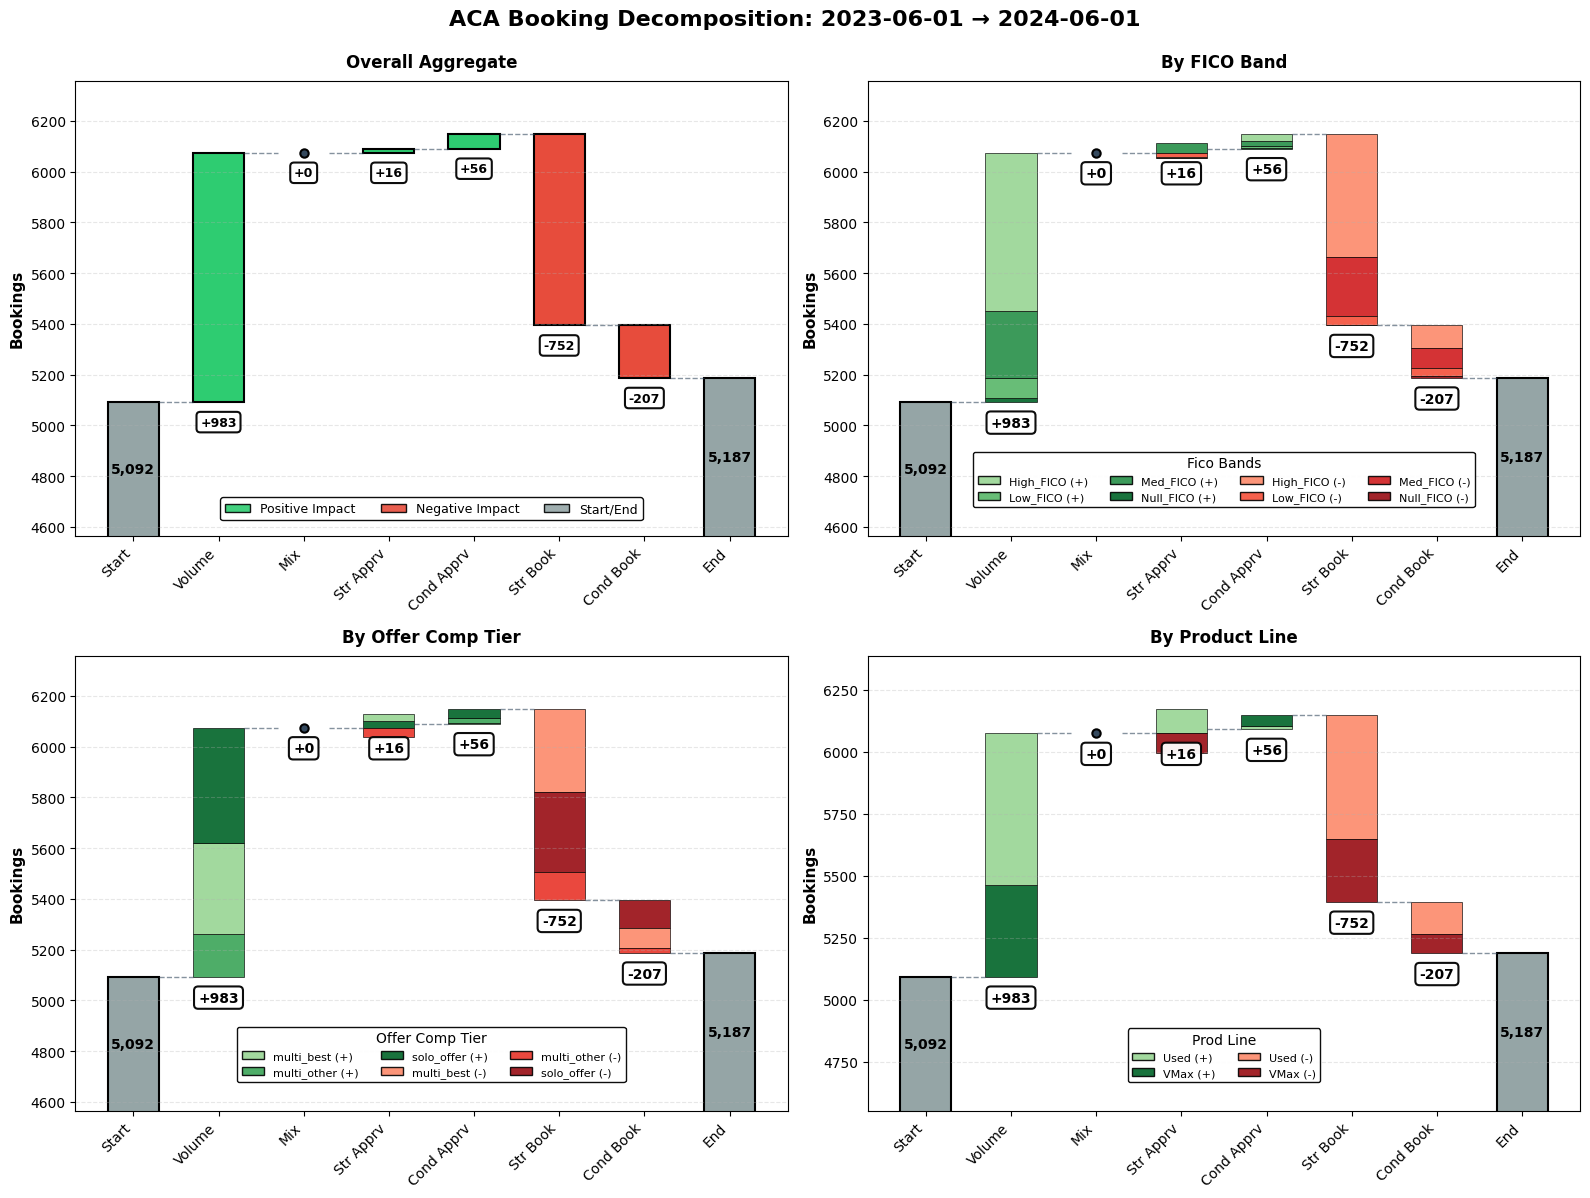

In [5]:
# Create waterfall grid
fig = visualization_engine.create_waterfall_grid(
    summary=results.summary,
    segment_detail=results.segment_detail,
    lender='ACA'
)

plt.show()

## 5. Detailed Breakdowns by Dimension

For each dimensional waterfall, we can view the exact contribution of each dimension value:

In [6]:
# Print detailed breakdowns
visualization_engine.print_waterfall_breakdowns(fig)


BREAKDOWN BY FICO BANDS

effect_type total_impact positive_contrib negative_contrib Null_FICO_positive Low_FICO_positive Med_FICO_positive High_FICO_positive Low_FICO_negative High_FICO_negative Null_FICO_negative Med_FICO_negative
     Volume        982.6            982.6              0.0               13.8              81.4             263.0              624.3                 -                  -                  -                 -
        Mix          0.0              0.0              0.0                  -                 -                 -                  -                 -                  -                  -                 -
  Str Apprv         16.2             39.0            -22.8                  -                 -              39.0                  -             -16.7               -5.4               -0.6                 -
 Cond Apprv         55.7             55.7              0.0                0.3               8.9              21.5               25.0              

## 6. Dimension Drilldown Charts

We can create horizontal bar charts showing the impact of each effect broken down by a specific dimension.

### By FICO Band

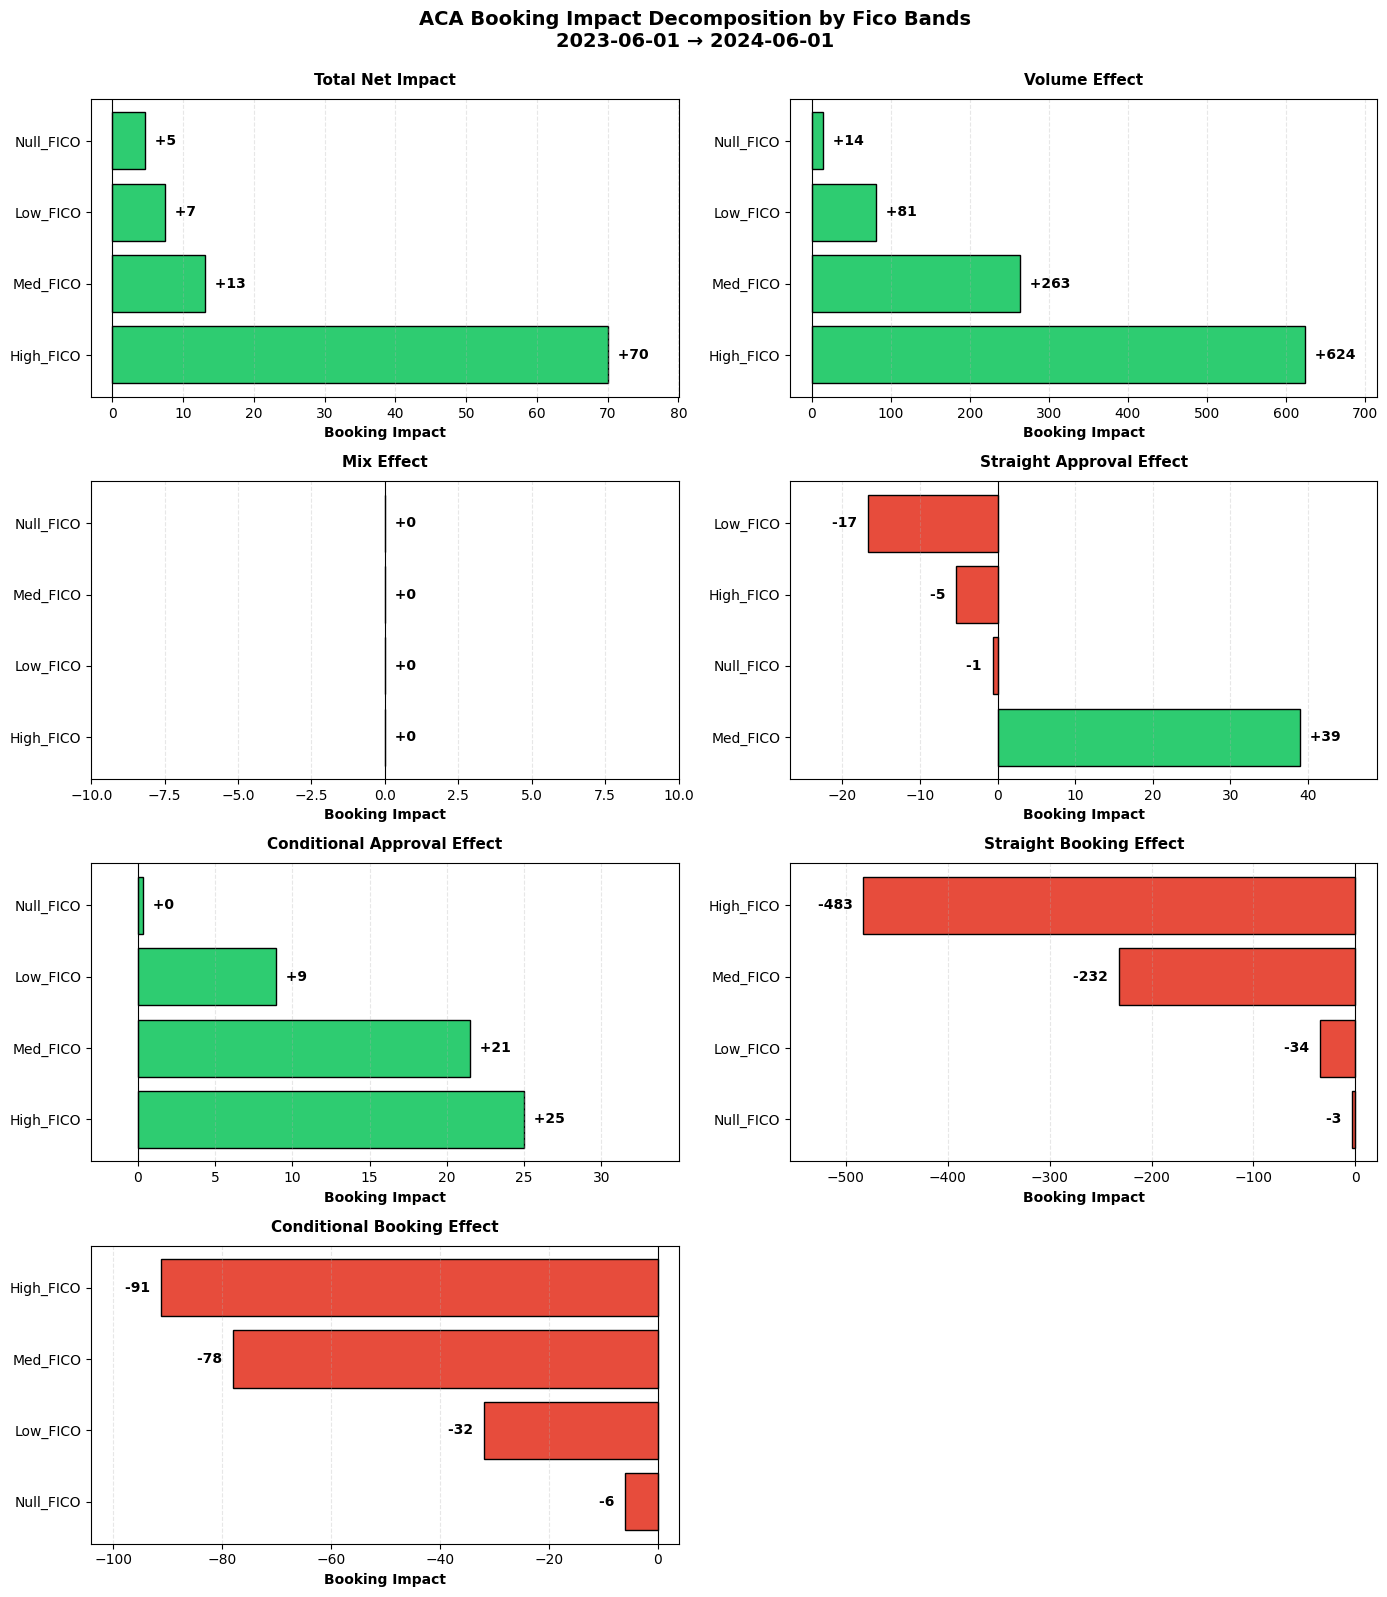

In [7]:
# Create FICO band drilldown
fig_fico = visualization_engine.create_dimension_drilldown(
    segment_detail=results.segment_detail,
    dimension='fico_bands',
    lender='ACA'
)

plt.show()

### By Offer Comp Tier

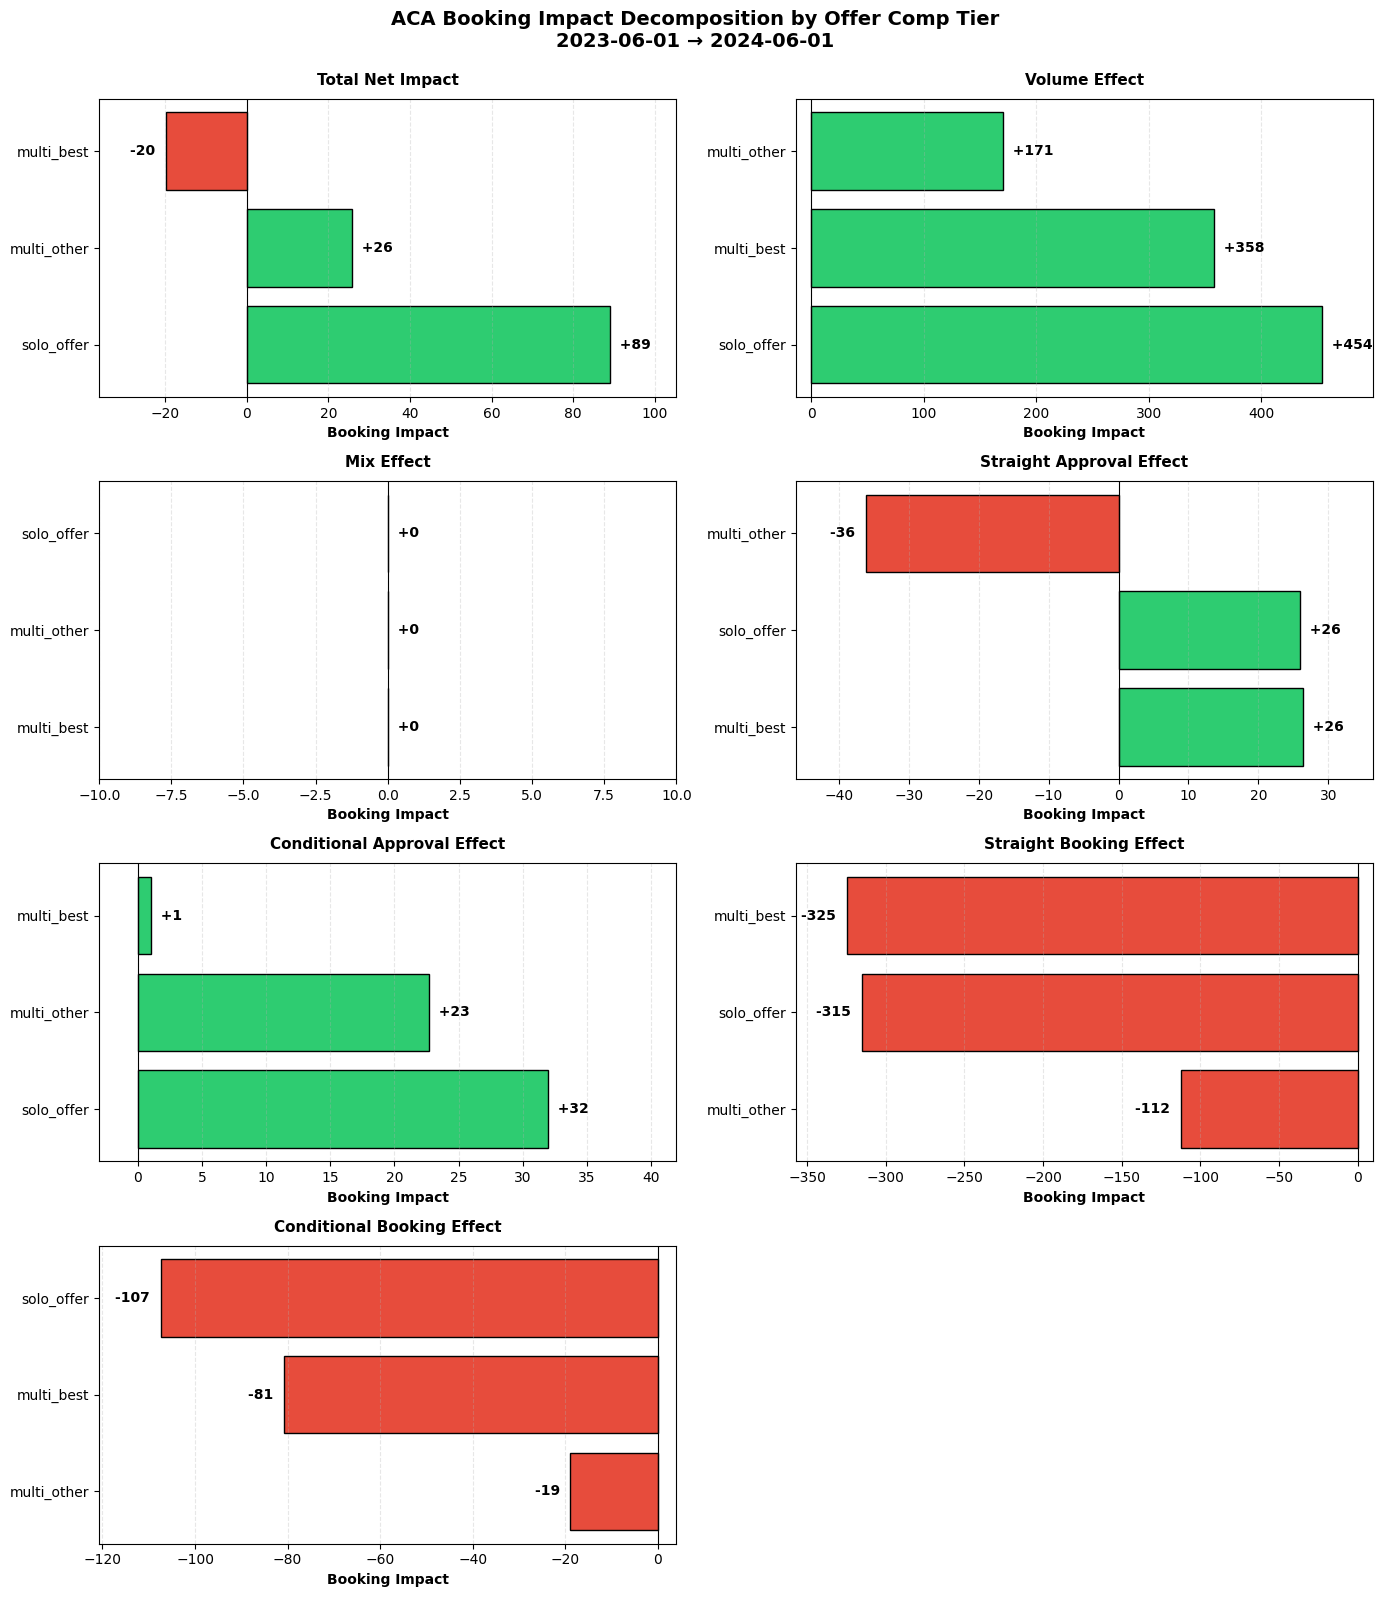

In [8]:
# Create Offer Comp Tier drilldown
fig_comp = visualization_engine.create_dimension_drilldown(
    segment_detail=results.segment_detail,
    dimension='offer_comp_tier',
    lender='ACA'
)

plt.show()

### By Product Line

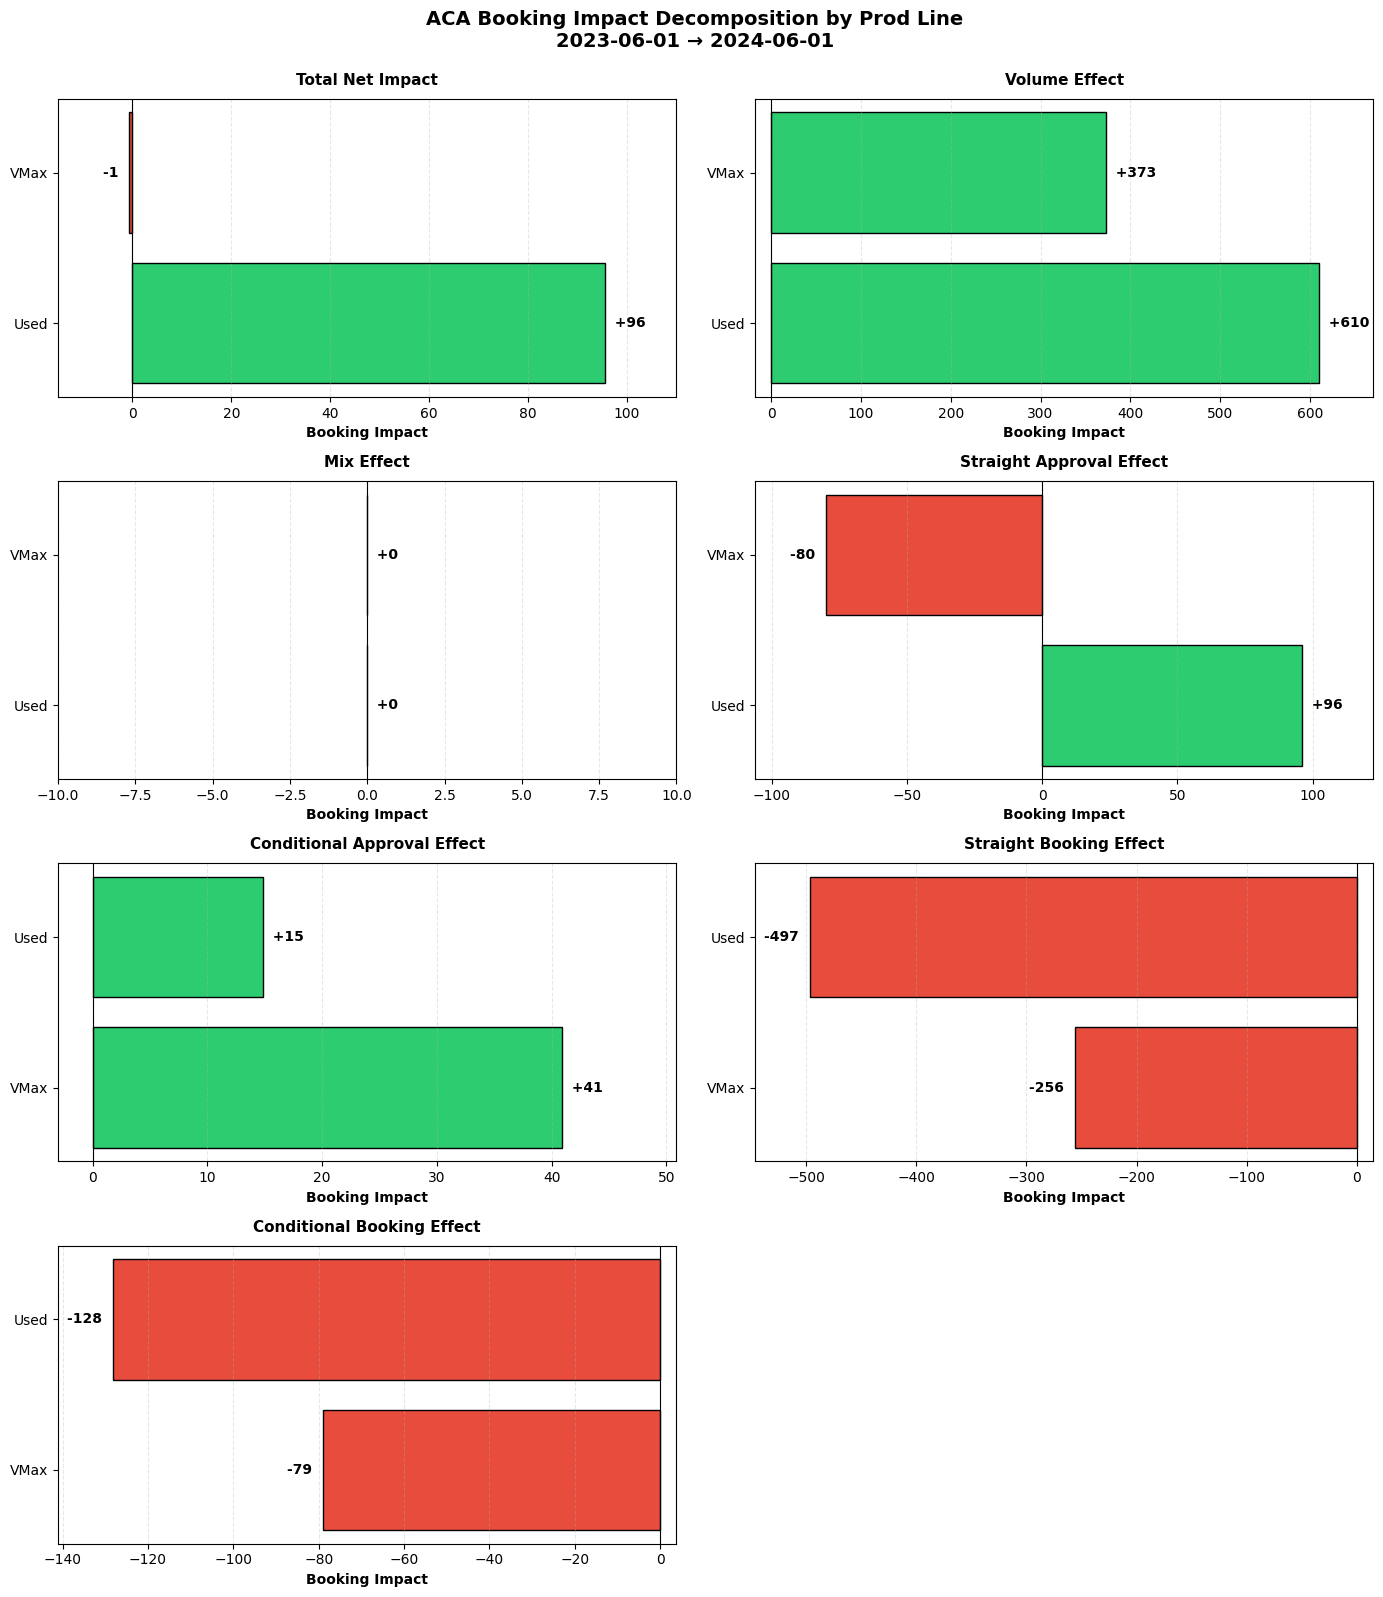

In [9]:
# Create Product Line drilldown
fig_prod = visualization_engine.create_dimension_drilldown(
    segment_detail=results.segment_detail,
    dimension='prod_line',
    lender='ACA'
)

plt.show()

## 7. Segment-Level Detail

For detailed analysis, we can examine the segment-level breakdown:

In [10]:
# Show segment detail (first 10 segments)
results.segment_detail.head(10)

,fico_bands,offer_comp_tier,prod_line,period_1_date,period_1_total_apps,period_1_pct_of_total,period_1_segment_apps,period_1_str_apprv_rate,period_1_str_bk_rate,period_1_cond_apprv_rate,...,delta_cond_apprv_rate,delta_cond_bk_rate,delta_segment_bookings,volume_effect,mix_effect,str_approval_effect,cond_approval_effect,str_booking_effect,cond_booking_effect,total_effect
0,High_FICO,multi_best,Used,2023-06-01,14573,0.119658,1743.777778,0.505422,0.644748,0.244578,...,0.025557,-0.031075,46.227733,136.341231,0.0,17.980657,17.244202,-107.876055,-17.462303,46.227733
1,High_FICO,multi_best,VMax,2023-06-01,14573,0.076923,1121.000000,0.556486,0.714620,0.225156,...,0.013008,-0.089180,-75.897320,102.463856,0.0,-42.670645,5.873125,-113.159962,-28.403694,-75.897320
2,High_FICO,multi_other,Used,2023-06-01,14573,0.064103,934.166667,0.476437,0.681085,0.223563,...,0.020017,0.004178,-8.726671,69.552122,0.0,-15.193259,6.122272,-70.341862,1.134056,-8.726671
3,High_FICO,multi_other,VMax,2023-06-01,14573,0.038462,560.500000,0.466906,0.639702,0.233094,...,0.029857,-0.056623,26.223321,40.302617,0.0,-0.800275,6.334599,-9.657916,-9.955703,26.223321
4,High_FICO,solo_offer,Used,2023-06-01,14573,0.145299,2117.444444,0.481621,0.649635,0.262995,...,-0.038531,-0.020158,79.113264,161.664392,0.0,90.453227,-30.640553,-130.933921,-11.429880,79.113264
5,High_FICO,solo_offer,VMax,2023-06-01,14573,0.094017,1370.111111,0.512601,0.678012,0.228853,...,0.033614,-0.058590,3.069680,113.966257,0.0,-55.157346,20.052855,-50.657192,-25.134893,3.069680
6,Low_FICO,multi_best,Used,2023-06-01,14573,0.031624,460.855556,0.296911,0.392057,0.403089,...,0.022572,-0.042148,4.708794,16.822348,0.0,-4.865238,2.240165,0.375133,-9.863613,4.708794
7,Low_FICO,multi_best,VMax,2023-06-01,14573,0.015385,224.200000,0.350448,0.420926,0.349552,...,0.077848,0.011432,0.068258,9.437474,0.0,-8.764261,4.207527,-6.119263,1.306782,0.068258
8,Low_FICO,multi_other,Used,2023-06-01,14573,0.015385,224.200000,0.278216,0.428851,0.421784,...,0.028470,0.045511,8.766217,8.265916,0.0,-3.265519,1.295413,-3.010323,5.480731,8.766217
9,Low_FICO,multi_other,VMax,2023-06-01,14573,0.007692,112.100000,0.249711,0.466565,0.450289,...,-0.011730,-0.076668,-1.377308,4.880573,0.0,0.731891,-0.380159,-2.113147,-4.496466,-1.377308
